In [4]:
import pandas as pd
import numpy as np

## **Series**

In [2]:
labels = ["a", "b", "c"]
data = [1,2,3]
pd.Series(data=data, index=labels)

a    1
b    2
c    3
dtype: int64

In [11]:
array = np.arange(5,8)
label = ["Item 01", "Item 02", "Item 03"]
serie_01 = pd.Series(array, label)
serie_01

Item 01    5
Item 02    6
Item 03    7
dtype: int64

In [10]:
serie_01["Item 01"]

5

In [12]:
serie_01[1]

6

In [15]:
serie_02 = pd.Series([1200, 300, 456, 852, 6], ["Audi", "Toyota", "Nissan", "Kia", "Ferrari"])
serie_03 = pd.Series([236, 789, 1300, 789], ["Audi", "Toyota", "Nissan", "Kia"])

car_sales = serie_02 + serie_03
car_sales

Audi       1436.0
Ferrari       NaN
Kia        1641.0
Nissan     1756.0
Toyota     1089.0
dtype: float64

## **Dataframes**

In [16]:
rows = ["Lexus", "Infinity", "Ferrari", "Tesla"]
columns = ["San Carlos", "New York", "London", "San Francisco"]
data = [[456,569,785,780], [4,895,123,102], [302,1020,895,6], [145,588,1360,458]]

dataframe = pd.DataFrame(data, rows, columns)
dataframe

,San Carlos,New York,London,San Francisco
Lexus,456,569,785,780
Infinity,4,895,123,102
Ferrari,302,1020,895,6
Tesla,145,588,1360,458


In [17]:
dataframe.loc['Lexus'] # Select a row

San Carlos       456
New York         569
London           785
San Francisco    780
Name: Lexus, dtype: int64

In [18]:
dataframe.loc[['Lexus', 'Tesla']] # Select multiple rows

,San Carlos,New York,London,San Francisco
Lexus,456,569,785,780
Tesla,145,588,1360,458


In [19]:
dataframe["San Carlos"] # Select a column

Lexus       456
Infinity      4
Ferrari     302
Tesla       145
Name: San Carlos, dtype: int64

In [20]:
dataframe[["San Carlos", "London"]] # Select multiple columns

,San Carlos,London
Lexus,456,785
Infinity,4,123
Ferrari,302,895
Tesla,145,1360


In [21]:
dataframe["San Carlos"]["Ferrari"] # Specific Value

302

In [23]:
# add new column
dataframe["Total"] = dataframe["San Carlos"] + dataframe["New York"] + dataframe["London"] + dataframe["San Francisco"]
dataframe

,San Carlos,New York,London,San Francisco,Total
Lexus,456,569,785,780,2590
Infinity,4,895,123,102,1124
Ferrari,302,1020,895,6,2223
Tesla,145,588,1360,458,2551


In [24]:
# Drops a column from view, but not permanently
dataframe.drop("Total", axis=1) #axis=1 significa que es una columna

,San Carlos,New York,London,San Francisco
Lexus,456,569,785,780
Infinity,4,895,123,102
Ferrari,302,1020,895,6
Tesla,145,588,1360,458


In [25]:
# Drops a column from permanently
dataframe.drop("Total", axis=1, inplace=True)
dataframe

,San Carlos,New York,London,San Francisco
Lexus,456,569,785,780
Infinity,4,895,123,102
Ferrari,302,1020,895,6
Tesla,145,588,1360,458


In [27]:
dataframe.shape

(4, 4)

## **Select Data**

In [31]:
rows = "Lexus Nissan Toyota Ferrari".split()
columns = "London California Amsterdam Bogota".split()

data = [[896,201,545,311], [5,895,21,256], [323,1020,8,32], [456,12,89,100]]

car_sales = pd.DataFrame(data, rows, columns)
car_sales

,London,California,Amsterdam,Bogota
Lexus,896,201,545,311
Nissan,5,895,21,256
Toyota,323,1020,8,32
Ferrari,456,12,89,100


In [32]:
select = car_sales > 200
car_sales[select]

,London,California,Amsterdam,Bogota
Lexus,896.0,201.0,545.0,311.0
Nissan,NaN,895.0,NaN,256.0
Toyota,323.0,1020.0,NaN,NaN
Ferrari,456.0,NaN,NaN,NaN


In [33]:
select = car_sales ["London"] > 400
car_sales[select]

,London,California,Amsterdam,Bogota
Lexus,896,201,545,311
Ferrari,456,12,89,100


In [36]:
select = (car_sales["London"] > 400) & (car_sales["Amsterdam"] > 500)
car_sales[select]

,London,California,Amsterdam,Bogota
Lexus,896,201,545,311


In [38]:
select = (car_sales["London"] > 400) & (car_sales["Amsterdam"] > 500)
car_sales[select]["London"]

Lexus    896
Name: London, dtype: int64

## **Modify Rows**

In [39]:
rows = "Lexus Nissan Toyota Ferrari".split()
columns = "London California Amsterdam Bogota".split()

data = [[896,201,545,311], [5,895,21,256], [323,1020,8,32], [456,12,89,100]]

car_sales = pd.DataFrame(data, rows, columns)
car_sales

,London,California,Amsterdam,Bogota
Lexus,896,201,545,311
Nissan,5,895,21,256
Toyota,323,1020,8,32
Ferrari,456,12,89,100


In [40]:
new_rows = "Tesla Audi Jeep Honda".split()
car_sales["brands"] = new_rows
car_sales

,London,California,Amsterdam,Bogota,brands
Lexus,896,201,545,311,Tesla
Nissan,5,895,21,256,Audi
Toyota,323,1020,8,32,Jeep
Ferrari,456,12,89,100,Honda


In [42]:
car_sales.set_index("brands")
car_sales

,London,California,Amsterdam,Bogota,brands
Lexus,896,201,545,311,Tesla
Nissan,5,895,21,256,Audi
Toyota,323,1020,8,32,Jeep
Ferrari,456,12,89,100,Honda


In [43]:
car_sales = car_sales.set_index("brands")
car_sales

,London,California,Amsterdam,Bogota
brands,,,,
Tesla,896,201,545,311
Audi,5,895,21,256
Jeep,323,1020,8,32
Honda,456,12,89,100


## **Null Values**

In [52]:
dict_data = {"Samsung": [80, np.nan, 120], 
             "Huawei": [np.nan, 300, 20], 
             "Apple":[63, 89, 155], 
             "Nokia": [np.nan, np.nan, 2]}
dataframe = pd.DataFrame(dict_data)
dataframe

,Apple,Huawei,Nokia,Samsung
0,63,NaN,NaN,80.0
1,89,300.0,NaN,NaN
2,155,20.0,2.0,120.0


In [53]:
dataframe.dropna() # drop rows

,Apple,Huawei,Nokia,Samsung
2,155,20.0,2.0,120.0


In [54]:
dataframe.dropna(axis=1)

,Apple
0,63
1,89
2,155


In [55]:
dataframe

,Apple,Huawei,Nokia,Samsung
0,63,NaN,NaN,80.0
1,89,300.0,NaN,NaN
2,155,20.0,2.0,120.0


In [59]:
dataframe.fillna(value=10)

,Apple,Huawei,Nokia,Samsung
0,63,10.0,10.0,80.0
1,89,300.0,10.0,10.0
2,155,20.0,2.0,120.0


In [57]:
mean = dataframe.mean()
mean

Apple      102.333333
Huawei     160.000000
Nokia        2.000000
Samsung    100.000000
dtype: float64

In [61]:
dataframe.fillna(value=mean)

,Apple,Huawei,Nokia,Samsung
0,63,160.0,2.0,80.0
1,89,300.0,2.0,100.0
2,155,20.0,2.0,120.0


## **Group By Columns**

In [64]:
dict_data = {"city": ["SanFrancisco", "Bogota", "SanFrancisco", "HongKong", "SanFrancisco", "HongKong"],
            "brand": ["Samsung", "Huawei", "Apple", "Nokia", "Blue", "Samsung"],
            "sales": [23,85,41,45,97,56]}
dataframe = pd.DataFrame(dict_data)
dataframe

,brand,city,sales
0,Samsung,SanFrancisco,23
1,Huawei,Bogota,85
2,Apple,SanFrancisco,41
3,Nokia,HongKong,45
4,Blue,SanFrancisco,97
5,Samsung,HongKong,56


In [68]:
dataframe.groupby("city").mean().round(2)

,sales
city,
Bogota,85.00
HongKong,50.50
SanFrancisco,53.67


In [69]:
dataframe.groupby("brand").sum()

,sales
brand,
Apple,41
Blue,97
Huawei,85
Nokia,45
Samsung,79


In [70]:
dataframe.groupby("city").describe()

sales                                                      
             count       mean        std   min    25%   50%    75%   max
city                                                                    
Bogota         1.0  85.000000        NaN  85.0  85.00  85.0  85.00  85.0
HongKong       2.0  50.500000   7.778175  45.0  47.75  50.5  53.25  56.0
SanFrancisco   3.0  53.666667  38.591882  23.0  32.00  41.0  69.00  97.0

## **Merge Dataframes**

In [72]:
dict_data01 = {"Samsung": [80, 34, 120], 
             "Huawei": [56, 300, 20], 
             "Apple":[63, 89, 155], 
             "Nokia": [78, 89, 2]}
sales_01 = pd.DataFrame(dict_data01)
sales_01

,Apple,Huawei,Nokia,Samsung
0,63,56,78,80
1,89,300,89,34
2,155,20,2,120


In [74]:
dict_data02 = {"Samsung": [2, 4, 6], 
             "Huawei": [21, 45, 45], 
             "Apple":[47, 78, 210], 
             "Nokia": [12, 7, 14]}
sales_02 = pd.DataFrame(dict_data02)
sales_02

,Apple,Huawei,Nokia,Samsung
0,47,21,12,2
1,78,45,7,4
2,210,45,14,6


In [75]:
pd.concat([sales_01, sales_02]) # merge rows

,Apple,Huawei,Nokia,Samsung
0,63,56,78,80
1,89,300,89,34
2,155,20,2,120
0,47,21,12,2
1,78,45,7,4
2,210,45,14,6


In [76]:
pd.concat([sales_01, sales_02], axis=1) # merge columns

,Apple,Huawei,Nokia,Samsung,Apple,Huawei,Nokia,Samsung
0,63,56,78,80,47,21,12,2
1,89,300,89,34,78,45,7,4
2,155,20,2,120,210,45,14,6


In [77]:
data = {
    "November": [5,10,15],
    "December": [6,12,18],
    "key": ["Aetna", "Humana", "Guardian"]
}
sales = pd.DataFrame(data)
sales

,December,November,key
0,6,5,Aetna
1,12,10,Humana
2,18,15,Guardian


In [78]:
data02 = {
    "January": [4,56,56],
    "March": [2,13,14],
    "key": ["Aetna", "Humana", "Guardian"]
}
sales02 = pd.DataFrame(data02)
sales02

,January,March,key
0,4,2,Aetna
1,56,13,Humana
2,56,14,Guardian


In [80]:
pd.merge(sales, sales02, on="key")

,December,November,key,January,March
0,6,5,Aetna,4,2
1,12,10,Humana,56,13
2,18,15,Guardian,56,14


## **Join**

In [86]:
data = {
    "November": [5,10,15, 5],
    "December": [6,12,18,7]
}
sales = pd.DataFrame(data, index=["Jhon", "Lisa", "Daisy", "David"])
sales

,December,November
Jhon,6,5
Lisa,12,10
Daisy,18,15
David,7,5


In [87]:
data02 = {
    "January": [4,56,56],
    "March": [2,13,14],
    "July": [5,89,45]
}
sales02 = pd.DataFrame(data02, index=["Jhon", "Lisa", "Daisy"])
sales02

,January,July,March
Jhon,4,5,2
Lisa,56,89,13
Daisy,56,45,14


In [88]:
sales.join(sales02)

,December,November,January,July,March
Jhon,6,5,4.0,5.0,2.0
Lisa,12,10,56.0,89.0,13.0
Daisy,18,15,56.0,45.0,14.0
David,7,5,NaN,NaN,NaN


## **Operations with dataframes**

In [95]:
dict_data = {"January": [2, 4, 4,6], 
             "February": [21, 45, 45,56], 
             "June":[47, 4, 210,12], 
             "July": [12, 7, 14,145]}
sales = pd.DataFrame(dict_data, index=["Louisa", "Anna", "Mario", "Jhon"])
sales

,February,January,July,June
Louisa,21,2,12,47
Anna,45,4,7,4
Mario,45,4,14,210
Jhon,56,6,145,12


In [97]:
sales["January"].unique()

array([2, 4, 6])

In [98]:
sales["January"].nunique()

3

In [99]:
sales["January"].value_counts()

4    2
6    1
2    1
Name: January, dtype: int64

In [100]:
def multiply(num):
    return num * 2

sales["January"].apply(multiply)

Louisa     4
Anna       8
Mario      8
Jhon      12
Name: January, dtype: int64

In [101]:
sales["January"].apply(lambda x: x*3)

Louisa     6
Anna      12
Mario     12
Jhon      18
Name: January, dtype: int64

In [102]:
sales.columns

Index([u'February', u'January', u'July', u'June'], dtype='object')

In [103]:
sales.index

Index([u'Louisa', u'Anna', u'Mario', u'Jhon'], dtype='object')

In [105]:
sales.sort_values('January')

,February,January,July,June
Louisa,21,2,12,47
Anna,45,4,7,4
Mario,45,4,14,210
Jhon,56,6,145,12


## **Excel Files**

In [109]:
cars = pd.read_excel("car_sales.xlsx")
cars

Numpy.ipynb       README.md         env/
Pandas.ipynb      car_sales.xlsx    requirements.txt


## **HTML Files**

In [ ]:
web_page = "https://es.wikipedia.org/wiki/Anexo:Pa%C3%ADses_y_territorios_dependientes_por_poblaci%C3%B3n"

countries = pd.read_html(web_page)

In [ ]:
countries.head(10)

## **Database Table**

In [116]:
from sqlalchemy import create_engine

dict_data = {"January": [2, 4, 4,6], 
             "February": [21, 45, 45,56], 
             "June":[47, 4, 210,12], 
             "July": [12, 7, 14,145]}
sales = pd.DataFrame(dict_data)
sales

,February,January,July,June
0,21,2,12,47
1,45,4,7,4
2,45,4,14,210
3,56,6,145,12


In [117]:
engine = create_engine("sqlite:///:memory:")
sales.to_sql('sales', engine, index=False)

In [119]:
db_info = pd.read_sql("sales", con=engine)
db_info

,February,January,July,June
0,21,2,12,47
1,45,4,7,4
2,45,4,14,210
3,56,6,145,12


## **Plots**

In [121]:
dataframe = pd.DataFrame(np.random.randint(200, size=(50,4)), columns=["a","b","c","d"])
dataframe

,a,b,c,d
0,8,15,197,52
1,102,133,171,89
2,104,94,3,75
3,46,135,86,163
4,61,33,191,55
5,146,161,120,162
6,34,76,90,19
7,6,16,198,170
8,66,14,3,28
9,66,93,55,47


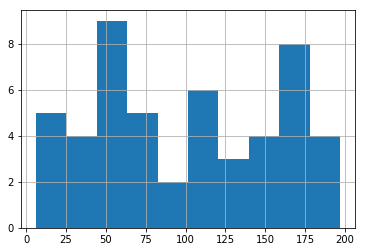

In [124]:
dataframe["a"].hist()

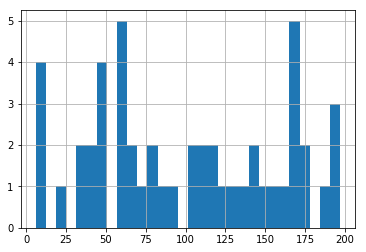

In [125]:
dataframe["a"].hist(bins=30)

In [ ]:
dataframe.plot.area(alpha=0.3)

In [ ]:
dataframe.plot.bar()

In [ ]:
dataframe.plot.scatter(x="a", y="b", c="c")

In [ ]:
dataframe.plot.box()